In [12]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import felzenszwalb, slic
from skimage.util import img_as_float
from skimage.segmentation import mark_boundaries
from time import time
from resizeimage import resizeimage

from metrics import *

# 0. Data presentation

Regarding the database, the images used were taken exclusively from the Berkley Dataset. I selected 108 color images and their associated ground truth. https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/ For reasons of private property I decided to leave only 5 images of this dataset with their 5 ground truths, but part 2 was made on 108 images. So if you reuse these codes with the database provided it is possible that you get quite different results.

In [13]:
idx=2
final_ls=pd.read_csv('Data/index.csv',index_col=[0]).iloc[:,0].tolist()
exemple_gt0 = np.load("Data/ground_truth/{}.npy".format(final_ls[idx]))
exemple_image0 = cv2.imread("Data/train/{}.jpg".format(final_ls[idx]))

In [17]:
exemple_image0.shape

(321, 481, 3)

In [14]:
print("Number of data : ",len(final_ls))
print('Shape : ',exemple_image0.shape[:2])

Number of data :  5
Shape :  (321, 481)


The file format for the ground truths of the berkley dataset are exclusively of type .seg. I couldn't find a method to open this type of file on python, so I implemented my own method. This is available in the metrics.py file under the name **Open_seg**. I have put an example below on how to use this function.

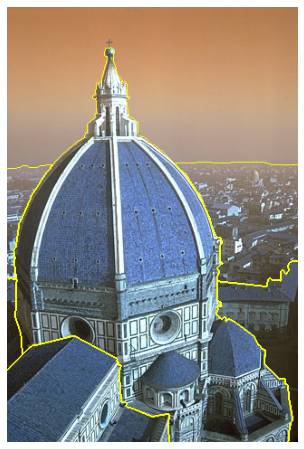

In [16]:
path_seg="Data/24004.seg"
Ground_truth_seg = Open_seg(path_seg)

f, axes  = plt.subplots(nrows=1,ncols=1,figsize=(5,3), sharex=False, sharey=False)
axes.imshow(mark_boundaries(exemple_image0,Ground_truth_seg))
f.set_figheight(8)
f.set_figwidt
axes.axis('off')
plt.show()

# 1. Example 
### 1.1 Felzenwalb and Huttenlocher's superpixel segmentation algorithm.

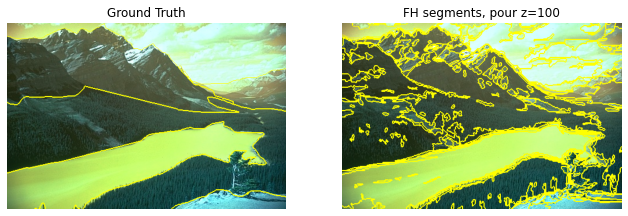

In [7]:
exemple_SLIC0 = felzenszwalb(image=img_as_float(exemple_image0), scale=100, sigma=1, min_size=20)

f, axes  = plt.subplots(nrows=1,ncols=2,figsize=(5,3), sharex=True, sharey=True)
axes[0].imshow(mark_boundaries(exemple_image0,exemple_gt0))
axes[0].set_title('Ground Truth')
axes[0].axis('off')

axes[1].imshow(mark_boundaries(exemple_image0,exemple_SLIC0))
axes[1].set_title('FH segments, pour z=100')
axes[1].axis('off')

f.set_figheight(8)
f.set_figwidth(11)
plt.show()

### 1.2 SLIC superpixel segmentation algorithm

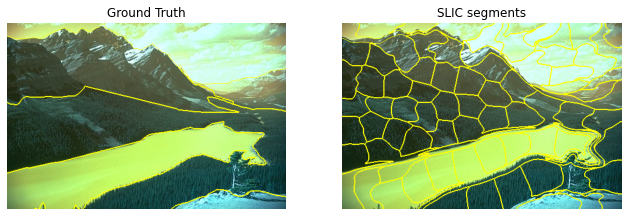

In [8]:
exemple_SLIC0 = slic(img_as_float(exemple_image0), n_segments = 100, sigma = 5)

f, axes  = plt.subplots(nrows=1,ncols=2,figsize=(5,3), sharex=False, sharey=False)
axes[0].imshow(mark_boundaries(exemple_image0,exemple_gt0))
axes[0].set_title('Ground Truth')
axes[1].imshow(mark_boundaries(exemple_image0,exemple_SLIC0))
axes[1].set_title('SLIC segments')
f.set_figheight(8)
f.set_figwidth(11)
axes[0].axis('off')
axes[1].axis('off')
plt.show()

### 1.3 Metrics

Four metrics have been implemented to test the properties of superpixel segmentation algorithms.

* **SRC** : the compactness of superpixels. This metric close to 1 means that superpixels are quite compact.
* **EV** : The homogeneity of colors. Strong EV = good homogeneity, weak EV = high variance in a superpixel
* **C** : measures the compactness of a single superpixel
* **Undersegmentation_error** : Adherence to the border of the image. A low value of UE means that superpixels respect the border of the image well.

In [11]:
print("SRC : ",SRC(exemple_image0,exemple_SLIC0))
print("EV : ",EV(exemple_image0,exemple_SLIC0))
print('C : ',C(exemple_image0,exemple_SLIC0))
print('UE : ',Undersegmentation_error(exemple_gt0,exemple_SLIC0))

SRC :  0.5052549891042205
EV :  0.8757799231026931
C :  0.5097204453450564
UE :  0.13810791380884838


### 1.4 Observer la moyenne et la variance de chaque superpixels : 

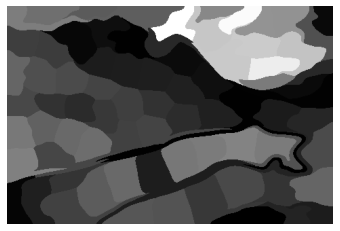

In [9]:
Image_colorfull_var(exemple_image0,exemple_SLIC0)
#plt.savefig('exemple')

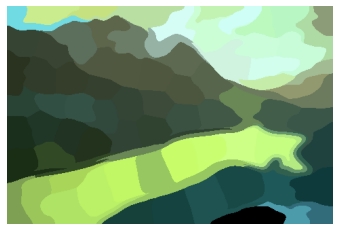

In [10]:
Image_colorfull_mean(exemple_image0,exemple_SLIC0)
#plt.savefig('exemple')

# 2. The importance of parameterization in SLIC

### 2.1 The parameter k

In [146]:
final_ls=pd.read_csv('Data/index.csv',index_col=[0]).iloc[:,0].tolist()
K = list(range(11,410,20))
M = 10

In [138]:
results=test_slic_params(K=K, M=M, final_ls=final_ls)

k = 11
Image : 0, SRC : 0.23704571779524491, EV : 0.4160571179275001, UE : 0.33172064947765884
Image : 20, SRC : 0.3256471702124847, EV : 0.3386287720314905, UE : 0.5535456376577872
Image : 40, SRC : 0.0, EV : 0.0, UE : 0.007551764561110355
Image : 60, SRC : 0.268160003200293, EV : 0.41424139055326936, UE : 0.3678732650695268
Image : 80, SRC : 0.28003883730721946, EV : 0.33645348168637645, UE : 0.44526266021593125
Image : 100, SRC : 0.4780280663859977, EV : 0.1283788073165366, UE : 0.008419634587858887
----------
k = 31
Image : 0, SRC : 0.2986379251951076, EV : 0.4023191646407864, UE : 0.2318508299816711
Image : 20, SRC : 0.4307270555145264, EV : 0.43414410670032605, UE : 0.25479109591259125
Image : 40, SRC : 0.040588374430780796, EV : 0.10330105376084743, UE : 0.007551764561110355
Image : 60, SRC : 0.37897209908631974, EV : 0.5486111204036991, UE : 0.19319823058140814
Image : 80, SRC : 0.41711998363878544, EV : 0.5273589889383014, UE : 0.350671303942332
Image : 100, SRC : 0.5059881705

Image : 0, SRC : 0.5337874501878022, EV : 0.6388159054676382, UE : 0.06704619788731939
Image : 20, SRC : 0.6127177502093099, EV : 0.7736733497664184, UE : 0.0936781497529161
Image : 40, SRC : 0.2689826784426319, EV : 0.4656548865630987, UE : 0.006010323767333113
Image : 60, SRC : 0.4961078831827583, EV : 0.6062708201552831, UE : 0.08189066132991367
Image : 80, SRC : 0.6565412901959671, EV : 0.8593961317895124, UE : 0.15241481596621784
Image : 100, SRC : 0.7115423933898454, EV : 0.5367504354935893, UE : 0.0258288482587548
----------
k = 331
Image : 0, SRC : 0.5416538386991224, EV : 0.640073367531805, UE : 0.06532341111780364
Image : 20, SRC : 0.6175060569259017, EV : 0.7958103037983039, UE : 0.08360049481544808
Image : 40, SRC : 0.2622385024218059, EV : 0.4719908275361991, UE : 0.007551764561110355
Image : 60, SRC : 0.4993879023362944, EV : 0.6100768120348529, UE : 0.06964980796756498
Image : 80, SRC : 0.659761035363145, EV : 0.8568631058848085, UE : 0.1489433358592237
Image : 100, SRC 

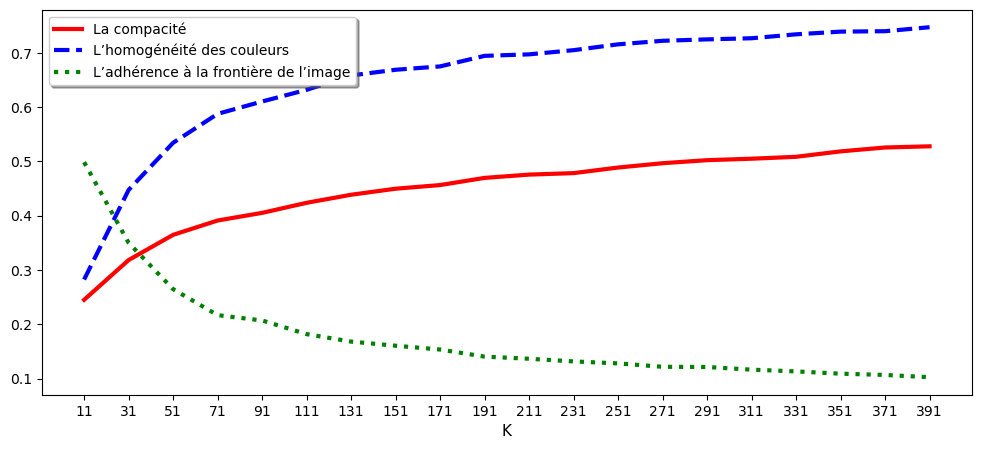

<Figure size 1100x800 with 0 Axes>

In [149]:
plt.style.use('default')
f, (ax1) = plt.subplots(1, sharex=True, sharey=True)
fig = plt.figure(figsize=(11, 8))


ax1.plot(results.index, results["SRC"],color="red",linewidth=3,linestyle="-", label='La compacité') 
ax1.plot(results.index, results["EV"],color="blue",linewidth=3,linestyle="--", label='L’homogénéité des couleurs') 
ax1.plot(results.index, results["UE"],color="green",linewidth=3,linestyle=":", label='L’adhérence à la frontière de l’image') 
legend=ax1.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
ax1.set_xlabel('K',fontsize=11)




plt.setp(ax1, xticks=K)
f.subplots_adjust(hspace=0.05,bottom=None)
f.set_figheight(5)
f.set_figwidth(12)   # save the figure to file 
#f.savefig('SLIC_test_K')

In [150]:
#results.to_csv('SLIC_K.csv')
#results=pd.read_csv('resultats/SLIC_K.csv').iloc[:,1:]

### 2.2 The parameter m

In [222]:
final_ls=pd.read_csv('Data/index.csv',index_col=[0]).iloc[:,0].tolist()
K = 200
M = list(range(1,120,10))

In [223]:
results2=test_slic_params(K=K, M=M, final_ls=final_ls)

m = 1
Image : 0, SRC : 0.18797662947989857, EV : 0.5288050598039263, UE : 0.1436907792047979
Image : 20, SRC : 0.29889493889121055, EV : 0.6158741363462658, UE : 0.1633927241403877
Image : 40, SRC : 0.14307755952403092, EV : 0.15887093994402005, UE : 0.007551764561110355
Image : 60, SRC : 0.2571430345563277, EV : 0.5046294594785521, UE : 0.22110608091916503
Image : 80, SRC : 0.27439307407309527, EV : 0.6448240407260377, UE : 0.4466357083179513
Image : 100, SRC : 0.24789170704899796, EV : 0.14460448194847317, UE : 0.08528442173301987
----------
m = 11
Image : 0, SRC : 0.5082759561730922, EV : 0.628994602855625, UE : 0.08471447723784173
Image : 20, SRC : 0.5997447727099249, EV : 0.7420944931389473, UE : 0.11362620708415101
Image : 40, SRC : 0.2657461085217994, EV : 0.42344263886181377, UE : 0.007551764561110355
Image : 60, SRC : 0.5010627308906319, EV : 0.6028199822550632, UE : 0.08384660721109319
Image : 80, SRC : 0.6512438697250489, EV : 0.8586461944725549, UE : 0.14053017791335548
Ima

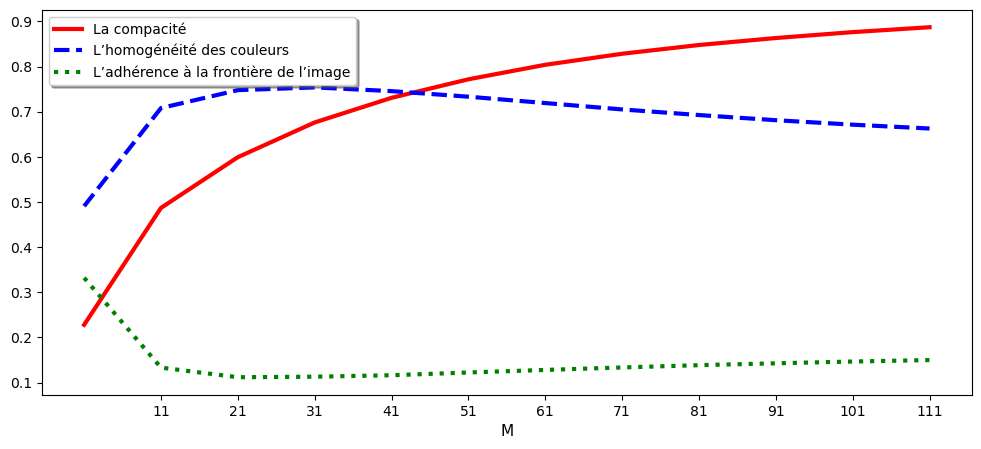

<Figure size 1100x800 with 0 Axes>

In [237]:
Y_ev = results2['EV'].max()
x_axes=M
y_axes=[Y_ev]*len(M)

plt.style.use('default')
f, (ax1) = plt.subplots(1, sharex=True, sharey=True)
fig = plt.figure(figsize=(11, 8))


ax1.plot(results2.index, results2["SRC"],color="red",linewidth=3,linestyle="-", label='La compacité') 
ax1.plot(results2.index, results2["EV"],color="blue",linewidth=3,linestyle="--", label='L’homogénéité des couleurs') 
ax1.plot(results2.index, results2["UE"],color="green",linewidth=3,linestyle=":", label='L’adhérence à la frontière de l’image') 
legend=ax1.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
ax1.set_xlabel('M',fontsize=11)




plt.setp(ax1, xticks=M[1:])
f.subplots_adjust(hspace=0.05,bottom=None)
f.set_figheight(5)
f.set_figwidth(12)   # save the figure to file 
#f.savefig('SLIC_test_M')


In [235]:
#results2.to_csv("SLIC_M.csv")
#results2=pd.read_csv('resultats/SLIC_M.csv',index_col=[0])

# 3. The importance of parameterization in the FH algorithm.

### 3.1 Superpixel size

In [379]:
scale = list(range(1,120,10))
final_ls=pd.read_csv('Data/index.csv',index_col=[0]).iloc[:,0].tolist()

In [380]:
results3=test_FH_params(scale, final_ls)

z = 1
Image : 0, SRC : 0.0, EV : 0.8954602627155669, UE : 0.023270574672443832
Image : 20, SRC : 0.0, EV : 0.9142783329106683, UE : 0.0637819703240264
Image : 40, SRC : 0.0, EV : 0.8248971951133068, UE : 0.004987014332808726
Image : 60, SRC : 0.0, EV : 0.897141729684007, UE : 0.04244791160679011
Image : 80, SRC : 0.0, EV : 0.9433740109146856, UE : 0.06315373605093232
Image : 100, SRC : 0.4242053133652355, EV : 0.799871213476974, UE : 0.010971431532179195
----------
z = 11
Image : 0, SRC : 0.0, EV : 0.8908782106638887, UE : 0.022616433831387103
Image : 20, SRC : 0.0, EV : 0.8991091763302669, UE : 0.09113930609257712
Image : 40, SRC : 0.0, EV : 0.8254542408171842, UE : 0.004987014332808726
Image : 60, SRC : 0.0, EV : 0.8972522363217609, UE : 0.04739606608765487
Image : 80, SRC : 0.0, EV : 0.9352658469012768, UE : 0.05858770344751653
Image : 100, SRC : 0.0, EV : 0.7854761934722232, UE : 0.008406681303877566
----------
z = 21
Image : 0, SRC : 0.0, EV : 0.8824896997436644, UE : 0.0229726491

In [ ]:
#results3.to_csv("FH_Z.csv")
#results3=pd.read_csv('resultats/FH_Z.csv',index_col=[0])

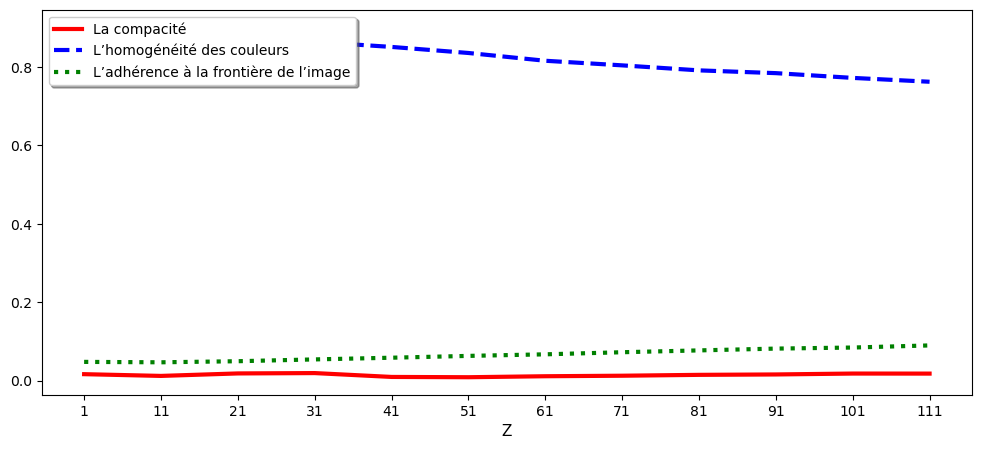

<Figure size 1100x800 with 0 Axes>

In [384]:
plt.style.use('default')
f, (ax1) = plt.subplots(1, sharex=True, sharey=True)
fig = plt.figure(figsize=(11, 8))


ax1.plot(results3.index, results3["SRC"],color="red",linewidth=3,linestyle="-", label='La compacité') 
ax1.plot(results3.index, results3["EV"],color="blue",linewidth=3,linestyle="--", label='L’homogénéité des couleurs') 
ax1.plot(results3.index, results3["UE"],color="green",linewidth=3,linestyle=":", label='L’adhérence à la frontière de l’image') 
legend=ax1.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
ax1.set_xlabel('Z',fontsize=11)




plt.setp(ax1, xticks=scale)
f.subplots_adjust(hspace=0.05,bottom=None)
f.set_figheight(5)
f.set_figwidth(12)   # save the figure to file 
#f.savefig('FH_test_Z')


# 4 Comparison of FH and SLIC

### 4.1 Segmentation time FH as a function of scale

In [436]:
scale = list(range(1,140,10))
final_ls=pd.read_csv('Data/index.csv',index_col=[0]).iloc[:,0].tolist()

In [408]:
results4=test_FH_time(scale,final_ls)

z = 1
Image : 0, Time : 0.3428349494934082
Image : 20, Time : 0.26445603370666504
Image : 40, Time : 0.25251007080078125
Image : 60, Time : 0.24486994743347168
Image : 80, Time : 0.38355207443237305
Image : 100, Time : 0.4544990062713623
----------
z = 11
Image : 0, Time : 0.2791330814361572
Image : 20, Time : 0.3113529682159424
Image : 40, Time : 0.28595685958862305
Image : 60, Time : 0.26361870765686035
Image : 80, Time : 0.28498315811157227
Image : 100, Time : 1.1045022010803223
----------
z = 21
Image : 0, Time : 0.532006025314331
Image : 20, Time : 0.30448412895202637
Image : 40, Time : 0.38692402839660645
Image : 60, Time : 0.5220479965209961
Image : 80, Time : 0.27097296714782715
Image : 100, Time : 0.6043999195098877
----------
z = 31
Image : 0, Time : 0.32106685638427734
Image : 20, Time : 0.30307602882385254
Image : 40, Time : 0.2711658477783203
Image : 60, Time : 0.26427698135375977
Image : 80, Time : 0.47991013526916504
Image : 100, Time : 0.33878302574157715
----------
z =

In [409]:
#results4.to_csv("FH_time.csv")
#results4=pd.read_csv('resultats/FH_time.csv',index_col=[0])

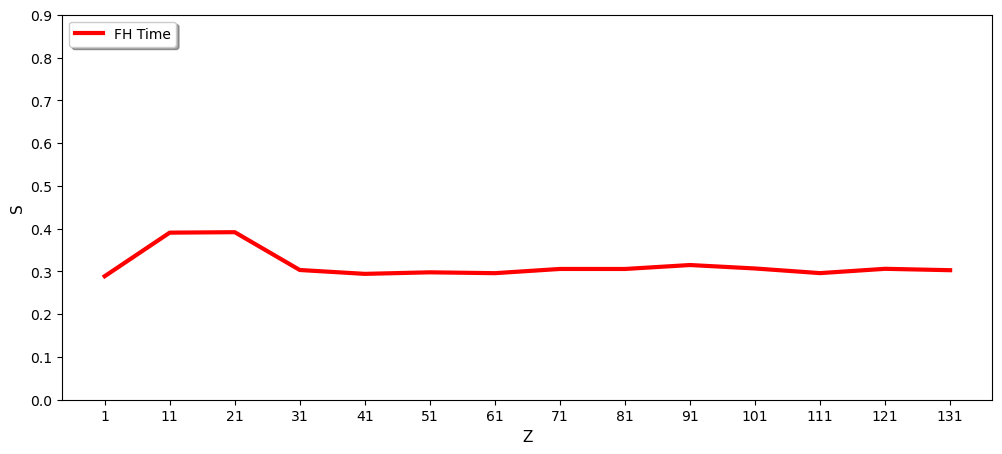

<Figure size 1100x800 with 0 Axes>

In [437]:
plt.style.use('default')
f, (ax1) = plt.subplots(1, sharex=True, sharey=True)
fig = plt.figure(figsize=(11, 8))


ax1.plot(results4.index, results4["Time"],color="red",linewidth=3,linestyle="-", label='FH Time')
legend=ax1.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
ax1.set_xlabel('Z',fontsize=11)
ax1.set_ylabel('S',fontsize=11)
ax1.set_yticks(np.arange(0,1,0.1))



plt.setp(ax1, xticks=scale)
f.subplots_adjust(hspace=0.05,bottom=None)
f.set_figheight(5)
f.set_figwidth(12)   
#f.savefig('FH_test_time')


### 4.2 Slic segmentation time as a function of k and m

In [434]:
final_ls=pd.read_csv('Data/index.csv',index_col=[0]).iloc[:,0].tolist()
K = 200
M = list(range(1,120,10))

In [422]:
results5=test_slic_time(K=K, M=M, final_ls=final_ls)

m = 1
Image : 0, Time : 0.29226207733154297
Image : 20, Time : 0.27897191047668457
Image : 40, Time : 0.317324161529541
Image : 60, Time : 0.2407207489013672
Image : 80, Time : 0.24503493309020996
Image : 100, Time : 0.2469949722290039
----------
m = 11
Image : 0, Time : 0.23038578033447266
Image : 20, Time : 0.2207508087158203
Image : 40, Time : 0.24467206001281738
Image : 60, Time : 0.24361109733581543
Image : 80, Time : 0.21993684768676758
Image : 100, Time : 0.2856130599975586
----------
m = 21
Image : 0, Time : 0.25201892852783203
Image : 20, Time : 0.22361016273498535
Image : 40, Time : 0.26474595069885254
Image : 60, Time : 0.25635576248168945
Image : 80, Time : 0.2550010681152344
Image : 100, Time : 0.21413683891296387
----------
m = 31
Image : 0, Time : 0.25851893424987793
Image : 20, Time : 0.23723912239074707
Image : 40, Time : 0.22489714622497559
Image : 60, Time : 0.22547411918640137
Image : 80, Time : 0.2473011016845703
Image : 100, Time : 0.22287273406982422
----------
m

In [423]:
#results5.to_csv("SLIC_time_m.csv")
#results5=pd.read_csv('resultats/SLIC_time_m.csv',index_col=[0])

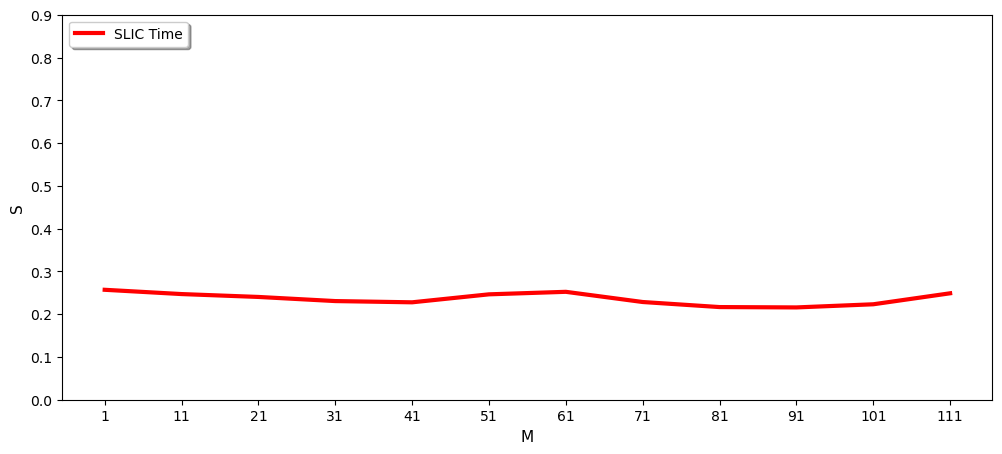

<Figure size 1100x800 with 0 Axes>

In [435]:
plt.style.use('default')
f, (ax1) = plt.subplots(1, sharex=True, sharey=True)
fig = plt.figure(figsize=(11, 8))


ax1.plot(results5.index, results5["Time"],color="red",linewidth=3,linestyle="-", label='SLIC Time')
legend=ax1.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
ax1.set_xlabel('M',fontsize=11)
ax1.set_ylabel('S',fontsize=11)
ax1.set_yticks(np.arange(0,1,0.1))



plt.setp(ax1, xticks=M)
f.subplots_adjust(hspace=0.05,bottom=None)
f.set_figheight(5)
f.set_figwidth(12)   # save the figure to file 
#f.savefig('SLIC_test_time_M')


In [427]:
final_ls=pd.read_csv('Data/index.csv',index_col=[0]).iloc[:,0].tolist()
K = list(range(11,410,20))
M = 10

In [428]:
results6=test_slic_time(K=K, M=M, final_ls=final_ls)

k = 11
Image : 0, Time : 0.18203282356262207
Image : 20, Time : 0.1614670753479004
Image : 40, Time : 0.18009305000305176
Image : 60, Time : 0.1703650951385498
Image : 80, Time : 0.20896410942077637
Image : 100, Time : 0.14917802810668945
----------
k = 31
Image : 0, Time : 0.18886399269104004
Image : 20, Time : 0.24175000190734863
Image : 40, Time : 0.2246561050415039
Image : 60, Time : 0.19387531280517578
Image : 80, Time : 0.1934370994567871
Image : 100, Time : 0.21944093704223633
----------
k = 51
Image : 0, Time : 0.2650129795074463
Image : 20, Time : 0.20174288749694824
Image : 40, Time : 0.2398240566253662
Image : 60, Time : 0.2111499309539795
Image : 80, Time : 0.25772809982299805
Image : 100, Time : 0.19035601615905762
----------
k = 71
Image : 0, Time : 0.24495315551757812
Image : 20, Time : 0.20068573951721191
Image : 40, Time : 0.24560093879699707
Image : 60, Time : 0.2126331329345703
Image : 80, Time : 0.201646089553833
Image : 100, Time : 0.19786596298217773
----------
k 

In [429]:
#results6.to_csv("SLIC_time_k.csv")
#results5=pd.read_csv('resultats/SLIC_time_m.csv',index_col=[0])

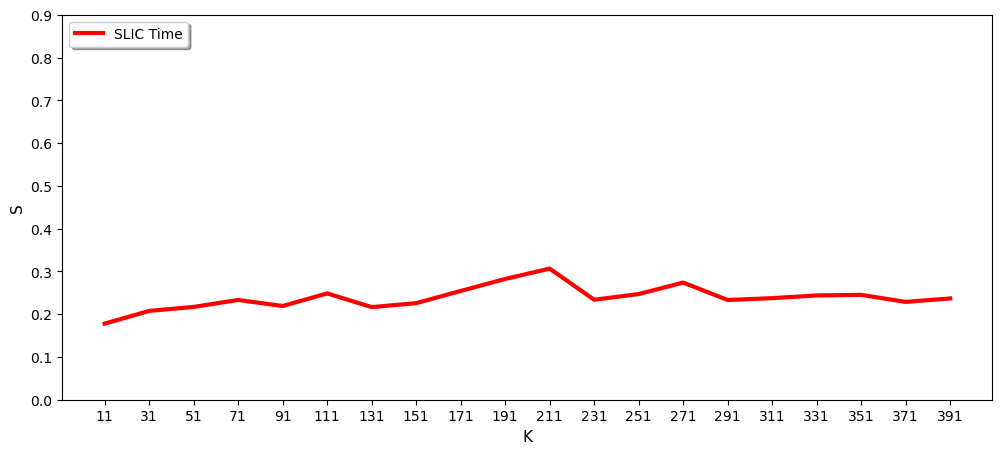

<Figure size 1100x800 with 0 Axes>

In [432]:
plt.style.use('default')
f, (ax1) = plt.subplots(1, sharex=True, sharey=True)
fig = plt.figure(figsize=(11, 8))


ax1.plot(results6.index, results6["Time"],color="red",linewidth=3,linestyle="-", label='SLIC Time')
legend=ax1.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
ax1.set_xlabel('K',fontsize=11)
ax1.set_ylabel('S',fontsize=11)
ax1.set_yticks(np.arange(0,1,0.1))



plt.setp(ax1, xticks=K)
f.subplots_adjust(hspace=0.05,bottom=None)
f.set_figheight(5)
f.set_figwidth(12)   # save the figure to file 
#f.savefig('SLIC_test_time_K')
